In [229]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [230]:
raw_df = pd.read_csv('../data/raw/raw_listings.csv')
print(len(raw_df))

140781


In [231]:
raw_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,municipal_eval,price
0,2 Storey,2 storey,1191.3,4076.29,3.0,1.0,2.0,Beauport,202012.0,2004.0,256000.0,332500.0
1,Bungalow,Open area,1261.0,9500.00,2.0,1.0,1.0,Deschambault,202112.0,1957.0,150500.0,265000.0
2,Townhouse,NaN,1645.0,1360.00,3.0,1.0,3.0,Mercier,202111.0,2006.0,479400.0,612000.0
3,Bi-generation,Link,2024.0,17000.00,4.0,3.0,1.0,Stoneham,202112.0,2019.0,NaN,526500.0
4,2 Storey,Waterfront,1469.0,16970.00,4.0,2.0,2.0,Trois-Rivières,202111.0,1925.0,NaN,NaN


In [232]:
processed_df = raw_df.copy()

In [233]:
print(len(processed_df))

140781


## Subtype

In [234]:
processed_df['subtype'].value_counts(dropna=False)

Bungalow                        48502
2 Storey                        38477
Semi-detached                   24858
Townhouse                       10140
Bi-generation                    8006
Split Level                      4158
1 1/2 Storey                     4046
Country Home                      659
Mobile home                       611
Acreage / Hobby Farm / Ranch      531
3 Storey                          363
Manufactured home                 184
Bi-Level                          161
Villa                              63
Misc.                              14
4 Storey                            8
Name: subtype, dtype: int64

In [235]:
subtypes = processed_df['subtype'].value_counts()
processed_df = processed_df[processed_df['subtype'].isin(subtypes.keys()[0:9])]

## Style

In [236]:
processed_df['style'].value_counts(dropna=False).iloc[0:10]

NaN              29482
2 storey         29141
Open area        20250
Detached         15308
Waterfront        5756
Link              4243
Bungaloft         3948
Side split        3325
Semi-detached     3218
Rural             3020
Name: style, dtype: int64

In [237]:
processed_df['style'] = processed_df['style'].fillna('Unknown')
styles = processed_df['style'].value_counts()
processed_df = processed_df[processed_df['style'].isin(styles.keys())]

In [238]:
print(len(processed_df))

139457


## Living Area

In [239]:
processed_df['living_area'].value_counts(dropna=False).iloc[0:5]

960.0     5195
1800.0    4763
1560.0    4143
1645.0    3818
2024.0    3812
Name: living_area, dtype: int64

In [240]:
mean_living_area = processed_df['living_area'].dropna().mean()
processed_df['living_area'] = processed_df['living_area'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='living_area', ylabel='Density'>

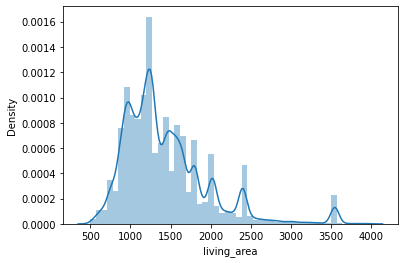

In [241]:
processed_df = processed_df[processed_df['living_area'] > 500]
processed_df = processed_df[processed_df['living_area'] < 4000]
processed_df['living_area'] = processed_df['living_area'].astype(int)

sns.distplot(processed_df['living_area'])

In [242]:
print(len(processed_df))

138697


## Lot Dimensions

In [243]:
processed_df['lot_dimensions'].value_counts(dropna=False).iloc[0:5]

17000.0    3877
9500.0     3866
6000.0     3814
10100.0    3805
6157.0     3804
Name: lot_dimensions, dtype: int64

In [244]:
mean_lot_dimensions = processed_df['lot_dimensions'].dropna().mean()
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].fillna(mean_lot_dimensions)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lot_dimensions', ylabel='Density'>

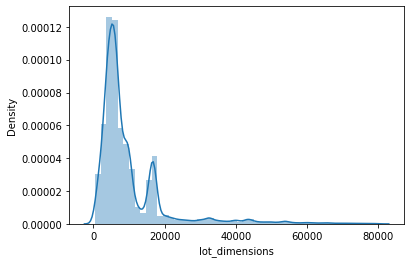

In [245]:
processed_df = processed_df[processed_df['lot_dimensions'] > 500]
processed_df = processed_df[processed_df['lot_dimensions'] < 80000]
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].astype(int)

sns.distplot(processed_df['lot_dimensions'])

In [246]:
print(len(processed_df))

133407


## Bedrooms, Bathrooms & Levels

In [247]:
processed_df['bedrooms'].value_counts(dropna=False)

3.0     52869
4.0     47949
2.0     15267
5.0     15211
6.0      1129
1.0       505
7.0       189
NaN       181
8.0        65
9.0        16
10.0       11
11.0        6
15.0        2
3.5         2
13.0        1
17.0        1
2.5         1
4.5         1
2.1         1
Name: bedrooms, dtype: int64

In [248]:
processed_df['bathrooms'].value_counts(dropna=False)

2.0       70435
1.0       55767
3.0        6915
4.0         162
NaN          91
5.0          25
6.0           6
7.0           2
8.0           2
11.0          1
2008.0        1
Name: bathrooms, dtype: int64

In [249]:
processed_df['levels'].value_counts(dropna=False)

1.0      63249
2.0      62913
3.0       5295
NaN       1836
4.0        106
5.0          5
11.0         1
6.0          1
768.0        1
Name: levels, dtype: int64

In [250]:
processed_df = processed_df[processed_df['bedrooms'] < 7]
processed_df = processed_df[processed_df['bathrooms'] < 5]
processed_df = processed_df[processed_df['levels'] < 4]

processed_df['bedrooms'] = processed_df['bedrooms'].astype(int)
processed_df['bathrooms'] = processed_df['bathrooms'].astype(int)
processed_df['levels'] = processed_df['levels'].astype(int)

In [251]:
print(len(processed_df))

130938


## Listing Date

In [252]:
processed_df['listing_date'].value_counts(dropna=False).iloc[0:5]

202112.0    21267
202111.0    11624
202012.0     4423
202109.0     4237
201907.0     3882
Name: listing_date, dtype: int64

In [253]:
processed_df['listing_date'] = pd.to_datetime(processed_df['listing_date'], format='%Y%m')

## Year of Construction

In [254]:
processed_df['year_of_construction'].value_counts(dropna=False).iloc[0:5]

NaN       14527
2004.0     6076
2006.0     6032
1989.0     5342
1975.0     5006
Name: year_of_construction, dtype: int64

In [255]:
mean_year_of_constructions = processed_df['year_of_construction'].dropna().mean()
processed_df['year_of_construction'] = processed_df['year_of_construction'].fillna(mean_year_of_constructions)

In [256]:
years = processed_df['year_of_construction'].value_counts()
processed_df = processed_df[processed_df['year_of_construction'].isin(years.keys())]
processed_df['year_of_construction'] = processed_df['year_of_construction'].astype(int)

In [257]:
print(len(processed_df))

130938


## Municipal Evaluation

In [258]:
processed_df['municipal_eval'].value_counts(dropna=False).iloc[0:5]

NaN         66586
256000.0     3850
150500.0     3811
209200.0     3805
251100.0     3803
Name: municipal_eval, dtype: int64

In [259]:
drop_municipal_eval = True

In [260]:
if drop_municipal_eval:
    processed_df = processed_df.drop(['municipal_eval'], axis=1)
else:
    processed_df = processed_df[processed_df['municipal_eval'] > 2000]
    processed_df = processed_df[processed_df['municipal_eval'] < 1000000]
    processed_df['municipal_eval'] = processed_df['municipal_eval'].astype(int)

    sns.distplot(processed_df['municipal_eval'])

## Price

In [261]:
processed_df['price'].value_counts(dropna=False).iloc[0:5]

NaN         24945
265000.0     4436
360000.0     4174
400000.0     4148
550000.0     3918
Name: price, dtype: int64

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

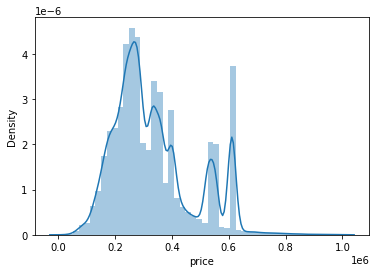

In [262]:
processed_df = processed_df[processed_df['price'] > 2000]
processed_df = processed_df[processed_df['price'] < 1000000]
processed_df['price'] = processed_df['price'].astype(int)

sns.distplot(processed_df['price'])

## Location

In [263]:
with open('../data/processed/location_mapper.pkl', 'rb') as f:
    location_mapper = pickle.load(f)

In [264]:
processed_df = processed_df.replace({'location': location_mapper})

In [265]:
processed_df['location'].value_counts().iloc[0:10]

Gatineau                        9021
Beauport                        4971
Châteauguay                     4652
Fabreville                      4467
Alma                            4301
Laval-sur-le-Lac                4259
Stoneham                        3993
Beaupré                         3951
Portneuf                        3875
Sainte-Foy-Sillery-Cap-Rouge    3097
Name: location, dtype: int64

In [266]:
locations = processed_df['location'].value_counts()
processed_df = processed_df[processed_df['location'].isin(locations.keys()[0:10])]

In [267]:
processed_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,price
0,2 Storey,2 storey,1191,4076,3,1,2,Beauport,2020-12-01,2004,332500
1,Bungalow,Open area,1261,9500,2,1,1,Portneuf,2021-12-01,1957,265000
2,Townhouse,Unknown,1645,1360,3,1,3,Châteauguay,2021-11-01,2006,612000
3,Bi-generation,Link,2024,17000,4,3,1,Stoneham,2021-12-01,2019,526500
5,Semi-detached,2 storey,2400,4471,4,2,2,Gatineau,2021-12-01,1989,360000


## Adding columns

In [268]:
processed_df.insert(8, 'listing_year', '')
processed_df['listing_year'] = pd.DatetimeIndex(processed_df['listing_date']).year

In [269]:
processed_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_year,listing_date,year_of_construction,price
0,2 Storey,2 storey,1191,4076,3,1,2,Beauport,2020,2020-12-01,2004,332500
1,Bungalow,Open area,1261,9500,2,1,1,Portneuf,2021,2021-12-01,1957,265000
2,Townhouse,Unknown,1645,1360,3,1,3,Châteauguay,2021,2021-11-01,2006,612000
3,Bi-generation,Link,2024,17000,4,3,1,Stoneham,2021,2021-12-01,2019,526500
5,Semi-detached,2 storey,2400,4471,4,2,2,Gatineau,2021,2021-12-01,1989,360000


In [270]:
print(len(raw_df))
print(len(processed_df))

140781
46587


In [271]:
processed_df.to_csv('../data/processed/processed_listings.csv', index=False)